# Compare the facilities being offered exemptions from reporting with all USA facilities
Do these facilities really deserve to be trusted to do the right thing?

Compare violations per facility, and also look at inspections per facility to see how often the EPA has deemed it necessary to look into these facilities.

In [14]:
import pandas as pd

### Run the cell for either Violations per facility or Inspections per facility
Then execute the rest of the cells to end with the chart.

## Violations per facility - CAA

In [ ]:
usa_filename = '/home/steve/workspace/EDGI/ECHO-Cross-Program/CSVs/caa_viol_years.csv'
exemptions_filename = '/home/steve/workspace/EDGI/ECHO-Cross-Program/CSVs/CAA-Violations-Exemptions-FullList.csv'
date_column = 'EARLIEST_FRV_DETERM_DATE'
data_column = 'Viol/fac'
graph_title = 'Violations per facility--All USA CAA facilities versus Exemption facilities'
y_axis = 'Violations/facility'

## Inspections per facility - CAA

In [ ]:
usa_filename = '/home/steve/workspace/EDGI/ECHO-Cross-Program/CSVs/caa_insp_years.csv'
exemptions_filename = '/home/steve/workspace/EDGI/ECHO-Cross-Program/CSVs/CAA-Inspections-Exemptions-FullList.csv'
date_column = 'ACTUAL_END_DATE'
data_column = 'Insp/fac'
graph_title = 'Inspections per facility--All USA CAA facilities versus Exemption facilities'
y_axis = 'Inspections/facility'

## Enforcements per facility - CAA

In [21]:
usa_filename = '/home/steve/workspace/EDGI/ECHO-Cross-Program/CSVs/caa_enf_count_years.csv'
exemptions_filename = '/home/steve/workspace/EDGI/ECHO-Cross-Program/CSVs/CAA-Penalties-Exemptions-FullList.csv'
date_column = 'SETTLEMENT_ENTERED_DATE'
data_column = 'Enf/fac'
graph_title = 'Enforcements per facility--All USA CAA facilities versus Exemption facilities'
y_axis = 'Enforcements/facility'

In [16]:
usa = pd.read_csv(usa_filename)
usa.set_index('Year', inplace=True)
usa['Who'] = 'USA'
usa.rename(columns={'USA' : data_column}, inplace=True)
usa

,Amount,Enf/fac,Who
Year,,,
2017,76757060,0.012184,USA
2018,165071700,0.013484,USA
2019,92641510,0.014902,USA
2020,183691100,0.012490,USA
2021,120379100,0.013678,USA
2022,295339200,0.015549,USA
2023,452594500,0.014218,USA
2024,387123400,0.012434,USA


In [17]:
num_facs = 386
exemptions = pd.read_csv(exemptions_filename)
exemptions = exemptions[['REGISTRY_ID', date_column]]
exemptions['Date'] = pd.to_datetime(exemptions[date_column])
exemptions['Year'] = pd.DatetimeIndex(exemptions['Date']).year
exemptions

,REGISTRY_ID,SETTLEMENT_ENTERED_DATE,Date,Year
0,110028925581,2023-11-13,2023-11-13,2023
1,110038174711,2023-07-19,2023-07-19,2023
2,110000367567,2017-03-24,2017-03-24,2017
3,110000607148,2023-11-29,2023-11-29,2023
4,110000743599,2024-03-15,2024-03-15,2024
...,...,...,...,...
693,110000748095,2021-10-13,2021-10-13,2021
694,110000748095,2021-12-21,2021-12-21,2021
695,110000468075,2018-07-31,2018-07-31,2018
696,110000468075,2024-11-15,2024-11-15,2024


In [18]:
df = exemptions.groupby(['Year', 'REGISTRY_ID']).count()
df = df.reset_index()
df1 = df.groupby(['Year']).count()
df2 = df.groupby(['Year']).sum()
df3 = df2.join(df1, lsuffix='_l', rsuffix='_r')
df3 = df3[['Date_l']]
df3[data_column] = df3['Date_l']/num_facs
df3['Who'] = 'Exemptions'
df3.drop(['Date_l'], axis=1, inplace=True)
df3

,Enf/fac,Who
Year,,
2017,0.209845,Exemptions
2018,0.266839,Exemptions
2019,0.230570,Exemptions
2020,0.253886,Exemptions
2021,0.189119,Exemptions
2022,0.233161,Exemptions
2023,0.225389,Exemptions
2024,0.199482,Exemptions


In [19]:
df4 = pd.concat([df3, usa], axis=0)
df4

,Enf/fac,Who,Amount
Year,,,
2017,0.209845,Exemptions,NaN
2018,0.266839,Exemptions,NaN
2019,0.230570,Exemptions,NaN
2020,0.253886,Exemptions,NaN
2021,0.189119,Exemptions,NaN
2022,0.233161,Exemptions,NaN
2023,0.225389,Exemptions,NaN
2024,0.199482,Exemptions,NaN
2017,0.012184,USA,76757060.0


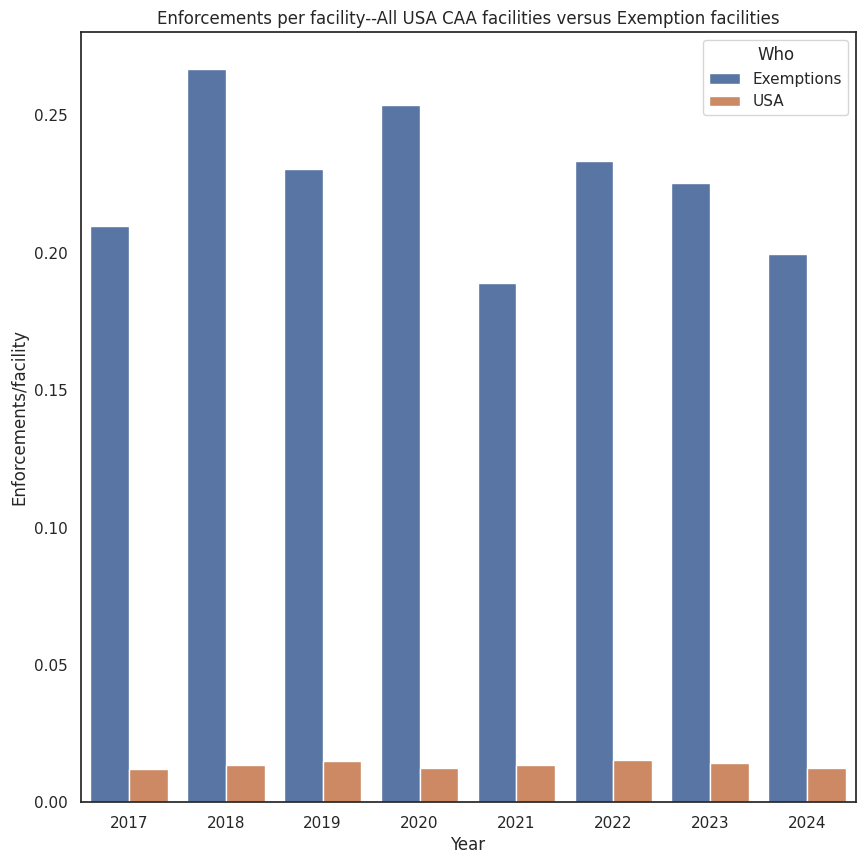

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

#set seaborn plotting aesthetics
sns.set(style='white')

#create grouped bar chart

fig, ax = plt.subplots(figsize=(10,10))
try:
    g = sns.barplot(x='Year', y=data_column, hue='Who', data=df4)
    g.set_title(graph_title)
    ax.set_ylabel(y_axis)
except TypeError as te:
    print("TypeError: {}".format(str(te)))
